<!-- dom:TITLE: Programmation Python  pour les mathématiques -->
# Programmation Python  pour les mathématiques
<!-- dom:AUTHOR: Julien Guillod at [Sorbonne Université](http://www.sorbonne-universite.fr/), -->
<!-- Author: -->  
**Julien Guillod**, [Sorbonne Université](http://www.sorbonne-universite.fr/),
Licence <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND</a>


L'entier des chapitres est disponible au format
[HTML](https://python.guillod.org//) et [PDF](https://python.guillod.org//python.pdf).
Ce notebook peut également être exécuté sur [mybinder](https://mybinder.org/v2/gh/juguillod/python/master?filepath=chap09.ipynb).






# Équations différentielles
<div id="ch:equadiff"></div>
Le but est d'introduire les méthodes de bases permettant de résoudre des équations différentielles ordinaires du premier ordre du type:

$$
\begin{align*}
\dot{\boldsymbol{x}}(t) &= f(t, \boldsymbol{x}(t)) \,, & \boldsymbol{x}(0) &= \boldsymbol{x}_0 \,,
\end{align*}
$$

où $f:\mathbb{R}^+ \times \mathbb{R}^n \to \mathbb{R}^n$ est une fonction assez régulière et $\boldsymbol{x}_0\in\mathbb{R}^n$ une donnée initiale.
A noter que les équations différentielles ordinaires d'ordre supérieur, peuvent être mises sous la forme précédente du premier ordre.

**Concepts abordés.**

* méthodes d'Euler

* méthodes de Runge-Kutta

* équation aux dérivées partielles non-linéaire

* différences finies

* méthode adaptatives





<!-- --- begin exercise --- -->

# Exercice 9.1: Méthodes d'Euler

L'idée la plus simple pour résoudre de manière approchée une équation différentielle ordinaire est de discrétiser le temps avec un pas $h$ et d'approximer la dérivée temporelle sur chaque intervalle de longueur $h$. Il y a deux façons simples d'approximer la dérivée en temps. La première est l'approximation par différence finie avant:

$$
\dot{\boldsymbol{x}}(t) \approx \frac{\boldsymbol{x}(t+h)-\boldsymbol{x}(t)}{h} \,,
$$

la seconde par différence finie arrière:

$$
\dot{\boldsymbol{x}}(t) \approx \frac{\boldsymbol{x}(t)-\boldsymbol{x}(t-h)}{h} \,.
$$

Les inconnues étant les évaluations de la solution $\boldsymbol{x}$ aux temps $t_i = ih$ pour $i\geq0$, c'est-à-dire $\boldsymbol{x}_i = \boldsymbol{x}(t_i)$. L'équation différentielle peut ainsi être approchée à l'aide des différences finies avant par:

$$
\frac{\boldsymbol{x}_{i+1}-\boldsymbol{x}_i}{t_{i+1}-t_i} = f(t_i, \boldsymbol{x}_i)
$$

ce qui donne la formule d'Euler explicite:

$$
\boldsymbol{x}_{i+1} = \boldsymbol{x}_i + (t_{i+1}-t_i) f(t_i, \boldsymbol{x}_i) \,.
$$

Avec l'approximation par différences finies arrière, on obtient la méthode d'Euler implicite:

$$
\boldsymbol{x}_{i} = \boldsymbol{x}_{i-1} + (t_i - t_{i-1}) f(t_i, \boldsymbol{x}_i) \,.
$$

La formule d'Euler explicite permet de calculer directement tous les $\boldsymbol{x}_i$ par récurrence en connaissant $\boldsymbol{x}_0$. Par contre la formule d'Euler implicite nécessite à chaque pas de temps, la résolution d'une équation non-linéaire pour $\boldsymbol{x}_i$ par exemple avec la méthode de Newton.


**a)**
Écrire une fonction `euler_explicit(f,x0,t)` qui pour une donnée initiale `x0` retourne les valeurs $\boldsymbol{x}_0, \boldsymbol{x}_1, \dots, \boldsymbol{x}_m$ calculées avec la méthode d'Euler explicite aux temps $(t_i)_ {i=0}^m$ représentés par le vecteur `t`.



In [1]:
import numpy as np

def euler_explicite(f, x0, t):
    x = np.zeros_like(t)
    m = len(t)
    x[0] = x0
    for i in range(m-1):
        x[i+1] = x[i] + (t[i+1]-t[i]) * f(t[i], x[i])
    return x


**b)**
Utiliser la méthode d'Euler explicite pour résoudre l'équation différentielle:

$$
\dot{x}(t) + x(t) = \sin(t) \,, \quad x(0)=1 \,,
$$

pour $t\in[0,10]$. Comparer les résultats avec la solution exacte:

$$
x(t) = \frac{1}{2}\big( \sin(t) - \cos(t) + 3e^{-t} \big) \,,
$$

pour différentes discrétisations du temps.



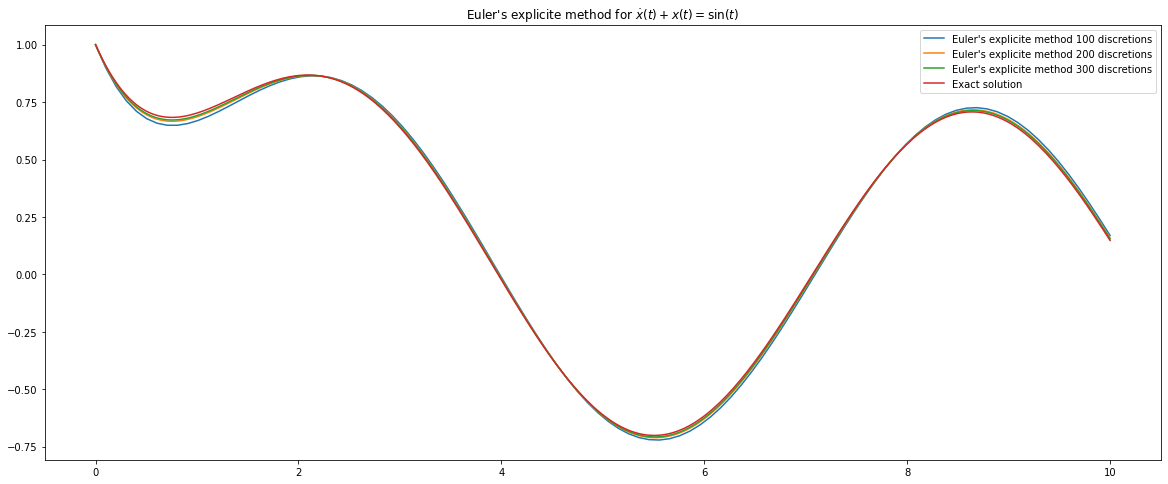

In [9]:
import matplotlib.pyplot as plt

def f(t, x):
    return np.sin(t) - x
    
def exact_sol(t):
    return 0.5 * (np.sin(t) - np.cos(t) + 3*np.exp(-t))

k_ = [100, 200, 300]
x0 = 1

fig, ax = plt.subplots(figsize=(20,8))

for k in k_:
    t = np.linspace(0, 10, k)
    ax.plot(t, euler_explicite(f, x0, t), label=f"Euler's explicite method {k} discretions")
ax.plot(t, exact_sol(t), label="Exact solution")
plt.title("Euler's explicite method for $\dot{x}(t)+x(t)=\sin{(t)}$")
plt.legend()
plt.show()


**c)**
Résoudre le problème précédent avec la méthode d'Euler implicite.

<!-- --- begin hint in exercise --- -->

**Indication:**
Vu que l'équation précédente est linéaire, la méthode d'Euler implicite peut en fait être rendue explicite en résolvant l'équation implicite à la main.

<!-- --- end hint in exercise --- -->




**d)**
<span style="color:red">!!</span> Définir une fonction `euler_implicit(f, Dxf, x0, t)` implémentant la méthode d'Euler implicite pour des équations non-linéaires. A noter que pour résoudre le problème non-linéaire avec la méthode de Newton, la dérivée de $f$ selon $\boldsymbol{x}$ est nécessaire.

<!-- --- begin hint in exercise --- -->

**Indication:**
Il est également possible d'utiliser l'algorithme de recherche de zéro de fonction `scipy.optimize.fsolve` qui ne nécessite pas de connaître la dérivée de $f$.

<!-- --- end hint in exercise --- -->



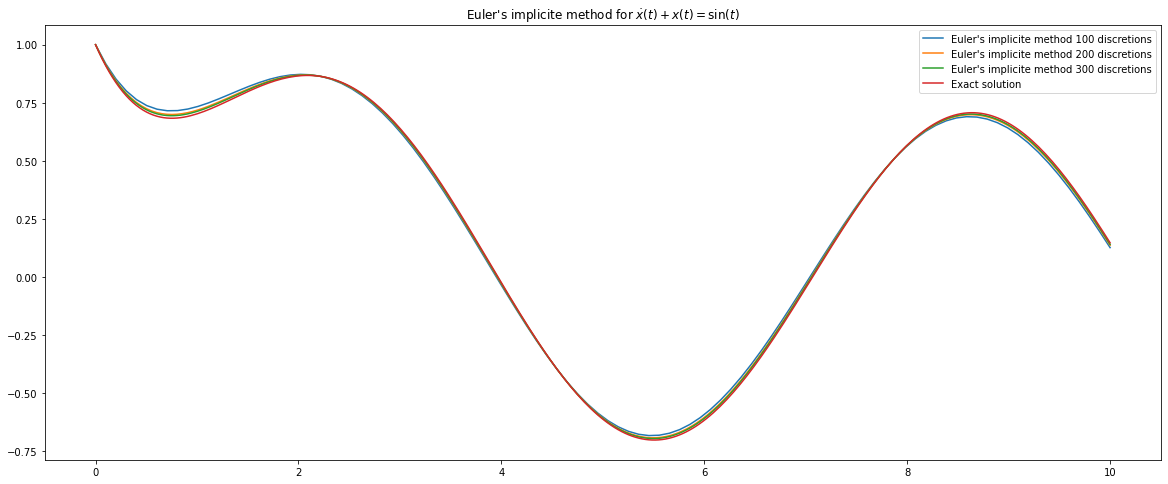

In [20]:
def newton1d(F, DF, x0, eps=1e-10, N=1000):
    for _ in range(1,N+1):
        xi = x0 - F(x0)/DF(x0)
        if np.abs(F(xi)) < eps:
            return xi
        x0 = xi
    return 'Error!'

def euler_implicite(f, Dxf, x0, T):
    x = np.zeros_like(T)
    x[0] = x0
    m = len(T)
    dt = T[1] - T[0]
    F = lambda x: -x + x0 + dt*f(t,x)
    DF = lambda x: -1 + dt*Dfx(t,x)
    for i in range(1, m):
        x0 = x[i-1]
        t = T[i]
        x[i] = newton1d(F, DF, x[i-1])
    return x

def Dxf(t, x):
    return -1

fig, ax = plt.subplots(figsize=(20,8))

for k in k_:
    t = np.linspace(0, 10, k)
    ax.plot(t, euler_implicite(f, Dxf, x0, t), label=f"Euler's implicite method {k} discretions")
ax.plot(t, exact_sol(t), label="Exact solution")
plt.title("Euler's implicite method for $\dot{x}(t)+x(t)=\sin{(t)}$")
plt.legend()
plt.show()


**e)**
<span style="color:red">!</span> Utiliser les méthodes précédentes pour trouver une solution approchée du système:

$$
\begin{align*}
\dot{x}(t)+\cos(y(t)) & =\sin(t)\,, & x(0) & =1\,,\\ 
\dot{y}(t)+\cos(x(t)) & =0\,, & y(0) & =0\,.
\end{align*}
$$

<!-- --- begin answer of exercise --- -->
**Réponse:**
Voici le graphique de la solution de l'équation différentielle avec un pas de temps $h=0.1$:
<!-- dom:FIGURE: [https://python.guillod.org/fig/euler_2d.png, width=800 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="https://python.guillod.org/fig/euler_2d.png" width=800>

<!-- end figure -->

<!-- --- end answer of exercise --- -->




<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercice 9.2: Méthodes de Runge-Kutta

Le but de cet exercice est d'introduire une classe de méthodes plus précises que les méthodes d'Euler pour résoudre des équations différentielles ordinaires. Au lieu de faire une approximation au premier ordre en $h$ l'idée est de faire une approximation d'un ordre supérieur.

L'idée de base est de construire une suite $\boldsymbol{x}_i$ donnant une approximation de la solution de $\dot{\boldsymbol{x}}(t)=f(t,\boldsymbol{x})$ au temps $t_i$ pour $i\in\mathbb{N}$. Cette suite est définie par:

$$
\boldsymbol{x}_{i+1} = \boldsymbol{x}_i + M(t_i, \boldsymbol{x}_i, t_{i+1}-t_i) \,,
$$

pour une certaine fonction $M$ appelée méthode.
Par exemple pour la méthode d'Euler explicite, la fonction $M$ est donnée par:

$$
M(t, \boldsymbol{x}, h) = h f(t,\boldsymbol{x})
$$

Une méthode de Runge-Kutta d'ordre deux est donnée par

$$
M(t,\boldsymbol{x}, h) = h f\bigg(t+\frac{h}{2}, \boldsymbol{x} + \frac{h}{2} f(t,\boldsymbol{x}) \bigg) \,.
$$

Une méthode de Runge-Kutta d'ordre quatre est donnée par:

$$
M(t,\boldsymbol{x}, h) = \frac{h}{6} \big(\boldsymbol{k}_1 + 2\boldsymbol{k}_2 + 2\boldsymbol{k}_3 + \boldsymbol{k}_4\big) \,,
$$

où

$$
\begin{align*}
\boldsymbol{k}_{1} & =f(t,\boldsymbol{x})\,,\\ 
\boldsymbol{k}_{2} & =f\bigg(t+\frac{h}{2},\boldsymbol{x}+\frac{h}{2}\boldsymbol{k}_{1}\bigg)\,,\\ 
\boldsymbol{k}_{3} & =f\bigg(t+\frac{h}{2},\boldsymbol{x}+\frac{h}{2}\boldsymbol{k}_{2}\bigg)\,,\\ 
\boldsymbol{k}_{4} & =f(t+h,\boldsymbol{x}+h\boldsymbol{k}_{3})\,.
\end{align*}
$$

A noter que plus généralement, une méthode de Runge-Kutta, d'ordre $s$ est donnée par:

$$
M(t,\boldsymbol{x},h) = h \sum_{i=1}^s b_i \boldsymbol{k}_i \,,
$$

où

$$
\begin{align*}
\boldsymbol{k}_{1} & =f(t,\boldsymbol{x})\,,\\ 
\boldsymbol{k}_{2} & =f(t+c_{2}h,\boldsymbol{x}+ha_{21}\boldsymbol{k}_{1})\,,\\ 
\boldsymbol{k}_{3} & =f(t+c_{3}h,\boldsymbol{x}+h(a_{31}\boldsymbol{k}_{1}+a_{32}\boldsymbol{k}_{2}))\,,\\ 
 & \vdots\\ 
\boldsymbol{k}_{s} & =f(t+c_{s}h,\boldsymbol{x}+h(a_{s1}\boldsymbol{k}_{1}+a_{s2}\boldsymbol{k}_{2}+\cdots+a_{s,s-1}\boldsymbol{k}_{s-1}))\,.
\end{align*}
$$

Les coefficients $a_{ij}$ (pour $1 \leq j < i \leq s$), $c_i$ (pour $2 \leq i \leq s$), et $b_i$ (pour $1 \leq i \leq s$), sont souvent représentés dans un tableau de Butcher:

$$
\begin{array}{c|ccccc}
0\\ 
c_{2} & a_{21}\\ 
c_{3} & a_{31} & a_{32}\\ 
\vdots & \vdots &  & \ddots\\ 
c_{s} & a_{s1} & a_{s2} & \cdots & a_{s,s-1}\\ 
\hline  & b_{1} & b_{2} & \cdots & b_{s-1} & b_{s}
\end{array}
$$

Par exemple, le tableau de Butcher de la méthode précédente d'ordre deux est:

$$
\begin{array}{c|cc}
0\\ 
\frac{1}{2} & \frac{1}{2}\\ 
\hline  & 0 & 1
\end{array}
$$

et celui de la méthode d'ordre quatre:

$$
\begin{array}{c|cccc}
0\\ 
\frac{1}{2} & \frac{1}{2}\\ 
\frac{1}{2} & 0 & \frac{1}{2}\\ 
1 & 0 & 0 & 1\\ 
\hline  & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}
\end{array}
$$

**a)**
Définir une fonction `integrate(f, x0, t, M)` qui donné une liste de temps $(t_i)_ {i=0}^N$ retourne les valeurs correspondantes $\boldsymbol{x}_0,\boldsymbol{x}_1,\dots,\boldsymbol{x}_N$ avec la méthode $M$.




**b)**
Implémenter les fonctions `M(f,t,x,h)` pour la méthode d'Euler explicite et la méthode de Runge-Kutta d'ordre deux. Comparer les deux méthodes.





**c)**
Implémenter la fonction `M(f,t,x,h)` pour la méthode de Runge-Kutta d'ordre quatre. Comparer avec la méthode d'ordre deux.




<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercice 9.3: Mouvement d'une planète

Le but est de simuler le mouvement bidimensionnel d'une planète gravitant autour d'une étoile fixe. L'étoile est supposée fixée à l'origine et la position de la planète dans le plan est décrite par le vecteur $\boldsymbol{x}\in\mathbb{R}^2$. L'étoile est supposée interagir avec la planète avec le potentiel:

$$
V(\boldsymbol{x}) = \frac{1}{\alpha} |\boldsymbol{x}|^\alpha \,,
$$

pour un certain $\alpha\in\mathbb{R}$ où $|\boldsymbol{x}|$ désigne la norme euclidienne du vecteur $\boldsymbol{x}$. A noter que le potentiel gravitationnel correspond à $\alpha=-1$. L'équation de la planète dans ce champs est donnée par:

$$
\ddot{\boldsymbol{x}} = -\boldsymbol{\nabla}V(\boldsymbol{x}) = -\boldsymbol{x} |\boldsymbol{x}|^{\alpha-2} \,.
$$

**a)**
Réécrire l'équation différentielle d'ordre deux comme une équation différentielle d'ordre un pour $\boldsymbol{x}$ et $\boldsymbol{p}=\dot{\boldsymbol{x}}$.




**b)**
Implémenter la fonction `f(t,xp)` correspondant à l'équation trouvée au point précédent.




**c)**
A l'aide de la méthode de Runge-Kutta d'ordre quatre, résoudre l'équation différentielle pour différentes données initiales et différentes valeurs de $\alpha$ et tracer les trajectoires $\boldsymbol{x}(t)$ dans le plan. Interpréter les résultats et en particulier pourquoi les cas $\alpha=-1$ et $\alpha=2$ sont différents des autres.




<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercice 9.4: <span style="color:red">!!</span> Équation des ondes cubique

Le but est de résoudre numériquement l'équation des ondes nonlinéaire sur $\mathbb{R}$:

$$
\begin{align*}-\frac{\partial^{2}u}{\partial t^{2}}+\frac{\partial^{2}u}{\partial x^{2}} & =u^{3}\,, & u(0,\cdot)) & =u_{0}\,, & \frac{\partial u}{\partial t}(0,\cdot) & =v_{0}\,,\end{align*}
$$

pour $u:\mathbb{R}^+ \times \mathbb{R}$ avec $u_0, v_0:\mathbb{R}\to\mathbb{R}$ deux fonctions données.

**Remarque.**
A noter, que les propriétés de cette équation d'apparence très simple sont très mal comprises mathématiquement, voir l'article suivant pour plus de détails [doi:10.2140/apde.2012.5.411](https://doi.org/10.2140/apde.2012.5.411).


**a)**
Réécrire l'équation précédente sous la forme de deux équations du premier ordre en temps pour $u$ et $v=\frac{\partial u}{\partial t}$.




**b)**
En approximant la seconde dérivée en espace par différences finies , montrer que l'équation peut s'approximer de la manière suivante:

$$
\begin{align*}
\frac{\partial u_{n}}{\partial t} & =v_{n} \,, & u_{n}(0) & =u_{0}(x_{n})\,,\\ 
\frac{\partial v_{n}}{\partial t} & =\frac{u_{n-1}-2u_{n}+u_{n}}{h^{2}}-u_{n}^{3} \,, & v_{n}(0) & =v_{0}(x_{n})\,,
\end{align*}
$$

où $(x_n)_ {n=0}^{N}$ représente $N+1$ points équidistants de $h$ dans l'intervalle $[-L,L]$ et $u_n(t) = u(t,x_n)$ et $v_n(t) = v(t,x_n)$. Pour les conditions au bord du domaine, *i.e.* lorsque $n=0$ ou $n=N$, on prendra:

$$
\frac{\partial v_{0}}{\partial t} = 0 \,, \qquad \frac{\partial v_{N}}{\partial t} = 0 \,.
$$

**c)**
Déterminer la fonction $f:\mathbb{R}\times\mathbb{R}^{2N+2} \to \mathbb{R}^{2N+2}$ permettant de mettre l'approximation précédente sous la forme $\dot{\boldsymbol{u}} = f(t,\boldsymbol{u})$ pour $\boldsymbol{u}=(u,v)$ et implémenter cette fonction.




**d)**
Résoudre l'équation différentielle donnée par $\dot{\boldsymbol{u}} = f(t,\boldsymbol{u})$ par exemple avec la méthode de Runge-Kutta d'ordre quatre. Un bon choix de paramètre est $L=100$, $N=1000$, pour la donnée initiale $u_0(x)=e^{-x^2}$ et $v_0(x)=0$. A noter que la vitesse de propagation de l'onde est un et que donc après un temps plus grand que $L$ l'onde sort de la boite $[-L,L]$ et donc ne correspond plus à une bonne approximation de l'équation initiale.




**e)**
A l'aide du module `matplotlib.animation` réaliser une vidéo montrant l'évolution de l'onde en fonction du temps.

<!-- --- begin hint in exercise --- -->

**Indication:**
Utiliser par exemple la fonction `FFMpegWriter`.

<!-- --- end hint in exercise --- -->


<!-- --- begin answer of exercise --- -->
**Réponse:**
Voici la forme de la solution:
<!-- dom:FIGURE: [https://python.guillod.org/fig/nonlinear-wave.png, width=800 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="https://python.guillod.org/fig/nonlinear-wave.png" width=800>

<!-- end figure -->

<!-- --- end answer of exercise --- -->




<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercice 9.5: <span style="color:red">!!!</span> Méthodes de Bogacki-Shampine

En combinant deux méthodes de Runge-Kutta d'ordres différentes (par exemple (2,3) ou (4,5)), il est possible d'obtenir une estimation empirique de l'erreur sur un pas de temps. En utilisant cette estimation d'erreur, il est possible d'adapter le pas de temps, soit en l'augmentant soit en le diminuant et ainsi de s'adapter à l'équation.

Pour une méthode de Runge-Kutta d'ordre $s$, une méthode interne d'ordre moins élevée (généralement $s-s$) est donnée par:

$$
M^*(t,\boldsymbol{x},h) = h \sum_{i=1}^s b_i^* \boldsymbol{k}_i \,,
$$

où les $\boldsymbol{k}_i$ sont identiques à ceux de la méthode d'ordre $s$.
Une estimation de l'erreur est alors donnée par:

$$
E(t,\boldsymbol{x},h) = M(t,\boldsymbol{x},h) - M^*(t,\boldsymbol{x},h) =h \sum_{i=1}^s (b_i - b_i^*) \boldsymbol{k}_i \,.
$$

Une telle méthode est donnée par un tableau de Butchler étendu:

$$
\begin{array}{c|ccccc}
0\\ 
c_{2} & a_{21}\\ 
c_{3} & a_{31} & a_{32}\\ 
\vdots & \vdots &  & \ddots\\ 
c_{s} & a_{s1} & a_{s2} & \cdots & a_{s,s-1}\\ 
\hline  & b_{1} & b_{2} & \cdots & b_{s-1} & b_{s}\\ 
& b_{1}^* & b_{2}^* & \cdots & b_{s-1}^* & b_{s}^*
\end{array}
$$

**a)**
Implémenter la méthode de Bogacki-Shampine d'ordre (4,5). L'article original est disponible à l'adresse [doi:10.1016/0898-1221(96)00141-1](https://doi.org/10.1016/0898-1221(96)00141-1).

<!-- --- begin hint in exercise --- -->

**Indication:**
Les coefficients des tables de Butcher sont implémentées dans un module `nodepy` donc la documentation est disponible [ici](http://nodepy.readthedocs.io/). Le nom de la méthode dans ce package est "BS5".

<!-- --- end hint in exercise --- -->

<!-- --- end exercise --- -->